# Hands-on-data #7 (Due by Nov. 13th)

The goal of this assignment is for you to familiarize yourself with BKT. You will be working with data in Excel.

When submitting the assignment, include a text document answering the questions as well as xlsx file(s) (including the formulas you used).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Q1 – (2 point)

Apply the following BKT model for the skill “TOTAL-AREA” by computing the values for p(Ln) and p(Corr) for each first attempt at a practice opportunity (use the file “[BKT-data.xlsx](./data/BKT-data.xlsx)”; note that the file has already been filtered to only include first attempts). Provide an excel file containing the application of the model (include the Excel formulas).

- P(L0) = 0.250
- P(T) = 0.175
- P(G) = 0.225
- P(S) = 0.125

In [2]:
q1 = pd.read_excel('./data/BKT-data.xlsx')

In [3]:
def calculate_pLn(pL_prev_or_outcome: float, pT: float) -> float:
  """Calculates the probability that student learned the skill after nth practice

  :param pL_prev_or_outcome: conditional probability of previous learning outcome `n - 1`
  :param pT: probability that skill will be learned at each practice opportunity
  :return: probability that student learned the skill after nth practice
  """
  return pL_prev_or_outcome + (1 - pL_prev_or_outcome) * pT

def calculate_pL_prev_or_outcome(pL_prev, pS: float, pG: float, outcome):
  """Calculate conditional probability that student learned skill based on previous outcome

  :param pL_prev: probability that student learned skill in previous attempt
  :param pS: probability that skill is applied incorrectly assuming student knows the skill
  :param pG: probability that skill is applied correctly assuming student doesn't know the skill
  :param outcome: actual outcome of practice (correct or incorrect)
  :return: conditional probability that student learned skill based on previous outcome
  """
  if outcome:
    pS = 1 - pS
  else:
    pG = 1 - pG
  return (pL_prev * pS) / (pL_prev * pS + (1 - pL_prev) * pG)

def calculate_p_correct(pL_prev, pS: float, pG: float):
  """Calculates probability that student will correctly apply skill at nth practice opportunity

  :param pL_prev: probability that student learned skill in previous attempt
  :param pS: probability that skill is applied incorrectly assuming student knows the skill
  :param pG: probability that skill is applied correctly assuming student doesn't know the skill
  :return: robability that student will correctly apply skill at nth practice opportunity
  """
  return pL_prev * (1 - pS) + (1 - pL_prev) * pG

- P(L0) = 0.250
- P(T) = 0.175
- P(G) = 0.225
- P(S) = 0.125

In [4]:
def run_bkt(data: pd.DataFrame, pL_0: float, pT: float, pS: float, pG: float, student_col='Student', outcome_col='right'):
  data['knows before'] = pL_0
  data['p(Ln)'] = 0.0
  data['p(Corr)'] = 0.0

  for student in data[student_col].unique():
    student_data = data[data[student_col] == student]
    for idx in student_data.index:
      pL_previous = data.loc[idx, 'knows before']

      data.loc[idx, 'p(corr)'] = calculate_p_correct(pL_previous, pS, pG)
      data.loc[idx, 'p(Ln)'] = calculate_pLn(calculate_pL_prev_or_outcome(pL_previous, pS, pG, data.loc[idx, outcome_col]), pT)

      if idx + 1 in student_data.index:
        data.loc[idx + 1, 'knows before'] = data.loc[idx, 'p(Ln)']
  data['L0'] = pL_0
  data['G'] = pG
  data['S'] = pS
  data['T'] = pT
  return data

In [5]:
def student_least_entries(data: pd.DataFrame):
  """Retrieves student with lowest amount of entries for debugging

  :param data: original dataframe
  :return: id of student with lowest number of entries
  """
  lowest_student = 'ABUGBBA'
  for student_name in data['Student'].unique():
    if 3 < len(data[data['Student'] == student_name]) < len(data[data['Student'] == lowest_student]):
      lowest_student = student_name
  return lowest_student

In [6]:
bkt_data = run_bkt(q1.drop(q1[['time', 'KC', 'item']], axis=1), .25, .175, .125, .225)

In [7]:
bkt_data

,id,Lesson,Student,right,knows before,p(Ln),p(Corr),p(corr),L0,G,S,T
0,87636,DZVolumeZ,ABUGBBA,1,0.250000,0.640726,0.0,0.387500,0.25,0.225,0.125,0.175
1,87644,DZVolumeZ,ABUGBBA,1,0.640726,0.896036,0.0,0.641472,0.25,0.225,0.125,0.175
2,87654,DZVolumeZ,ABUGBBA,1,0.896036,0.976099,0.0,0.807423,0.25,0.225,0.125,0.175
3,87655,DZVolumeZ,ABUGBBA,0,0.976099,0.891260,0.0,0.859464,0.25,0.225,0.125,0.175
4,87721,DZVolumeZ,ABUGBBA,1,0.891260,0.974904,0.0,0.804319,0.25,0.225,0.125,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...
1346,100915,DZVolumeZ,SNSIGCEG,0,0.621758,0.347893,0.0,0.629142,0.25,0.225,0.125,0.175
1347,100917,DZVolumeZ,SNSIGCEG,0,0.347893,0.240364,0.0,0.451131,0.25,0.225,0.125,0.175
1348,100985,DZVolumeZ,SNSIGCEG,1,0.240364,0.630132,0.0,0.381237,0.25,0.225,0.125,0.175
1349,100992,DZVolumeZ,SNSIGCEG,1,0.630132,0.891808,0.0,0.634586,0.25,0.225,0.125,0.175


In [8]:
bkt_data.to_csv('./out/q1.csv')

## Q2 – (3 point)

Examine the impact of each parameters on the predictions produced by BKT. Compare your result to each of the 4 files in which one of the parameters was increased: “[BKT-data-high-initial-knowledge.xlsx](./data/BKT-data-high-initial-knowledge.xlsx)”, “[BKT-data-high-learning.xlsx](./data/BKT-data-high-learning.xlsx)”, “[BKT-data-high-guess.xlsx](./data/BKT-data-high-guess.xlsx)” and “[BKT-data-high-slip.xlsx”](./data/BKT-data-high-slip.xlsx)”.

Examine the values for p(Ln) and p(Corr). How does the increase of each one of those parameters impacts those values? Look at what happens in different cases of success and failures at applying the skill. You can look, for example at the magnitude and the direction of changes in p(Ln) and p(Corr) in each model. Suggestion: pick a student and compare the progression of both p(Ln) and p(Corr) for two models. You can do this model comparison across a few students to see how different sequences of successes and failures impact the values computed by the BKT models.

#### Answer

`high slip` makes it so $p(\text{corr})$ increases slower for each correct practice when compared to the other datasets.
However, for incorrect practices, `high slip` is "charitable:" incorrectness doesn't produce a significant decrease in $p(\text{corr})$.

It is interesting how $p(\text{corr})$ is affected by the `right` feature after $p(L_n)$. As an example, we can observe the `high initial knowledge` plot, practice 4: while $p(L_n)$ is immediately affected by the incorrect practice, the change is only reflected in $p(\text{corr})$ in the next practice opportunity.

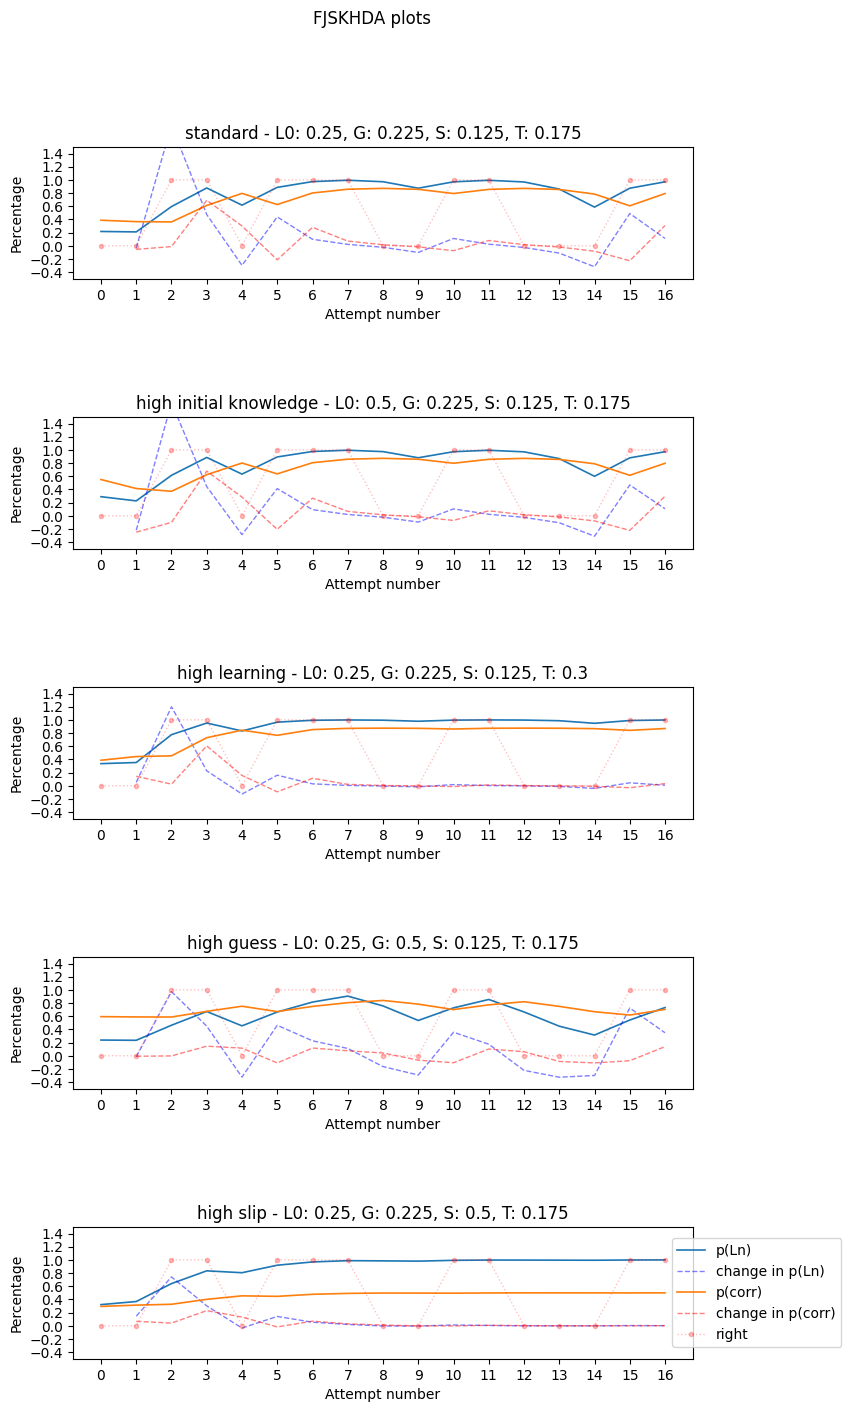

In `high guess`, changes to `right` have a more significant effect on both $p(L_n)$ and $p(\text{corr})$ when compared to the other plots.

`high learning` has a lower initial value but a steeper growth for both variables.

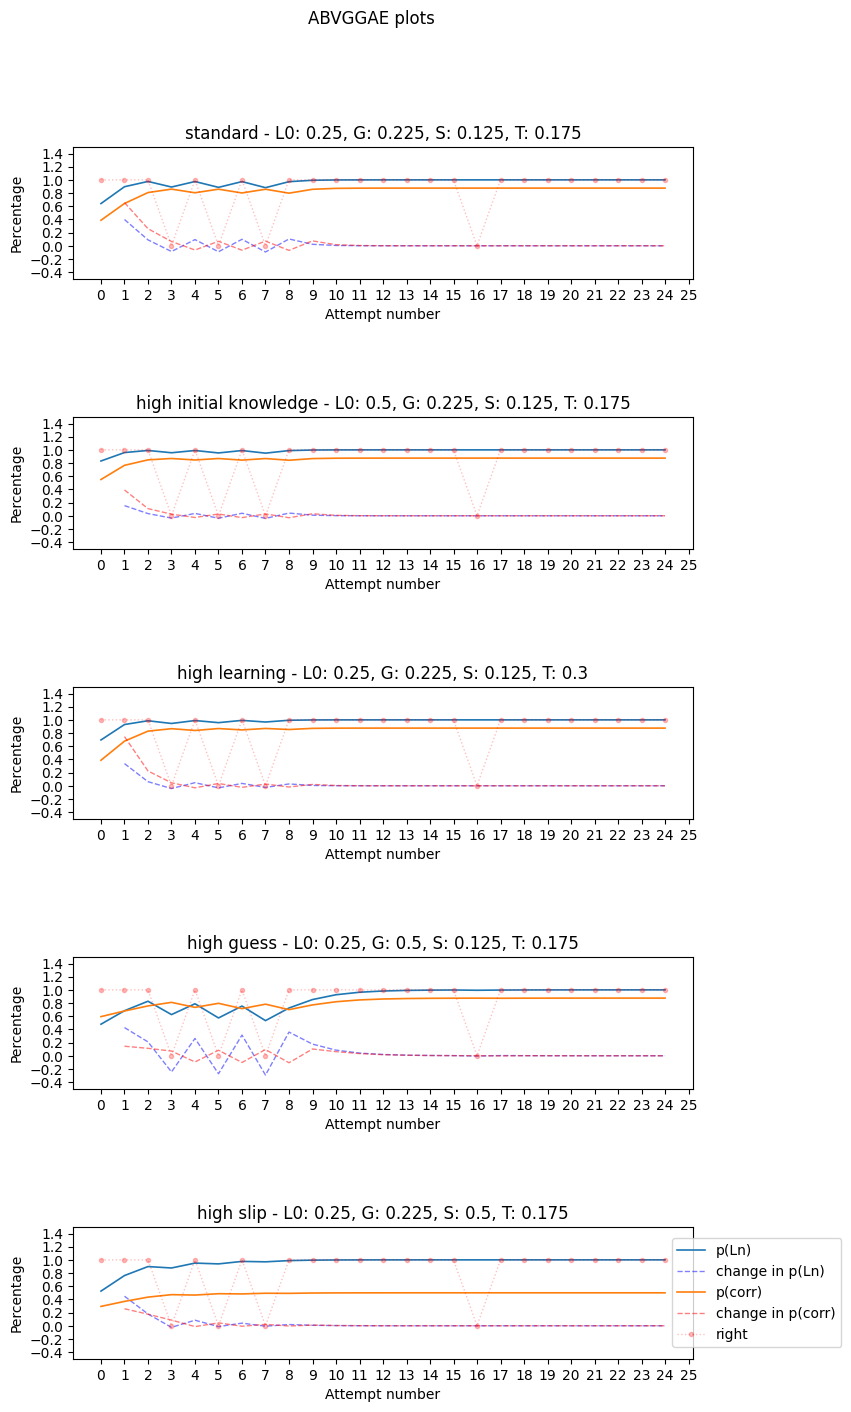

`high slip` seems a little too generous.

The following student's practices could be interpreted as initial luck, followed my mistakes.
`high slip` is the only plot that doesn't reflect this interpretation.

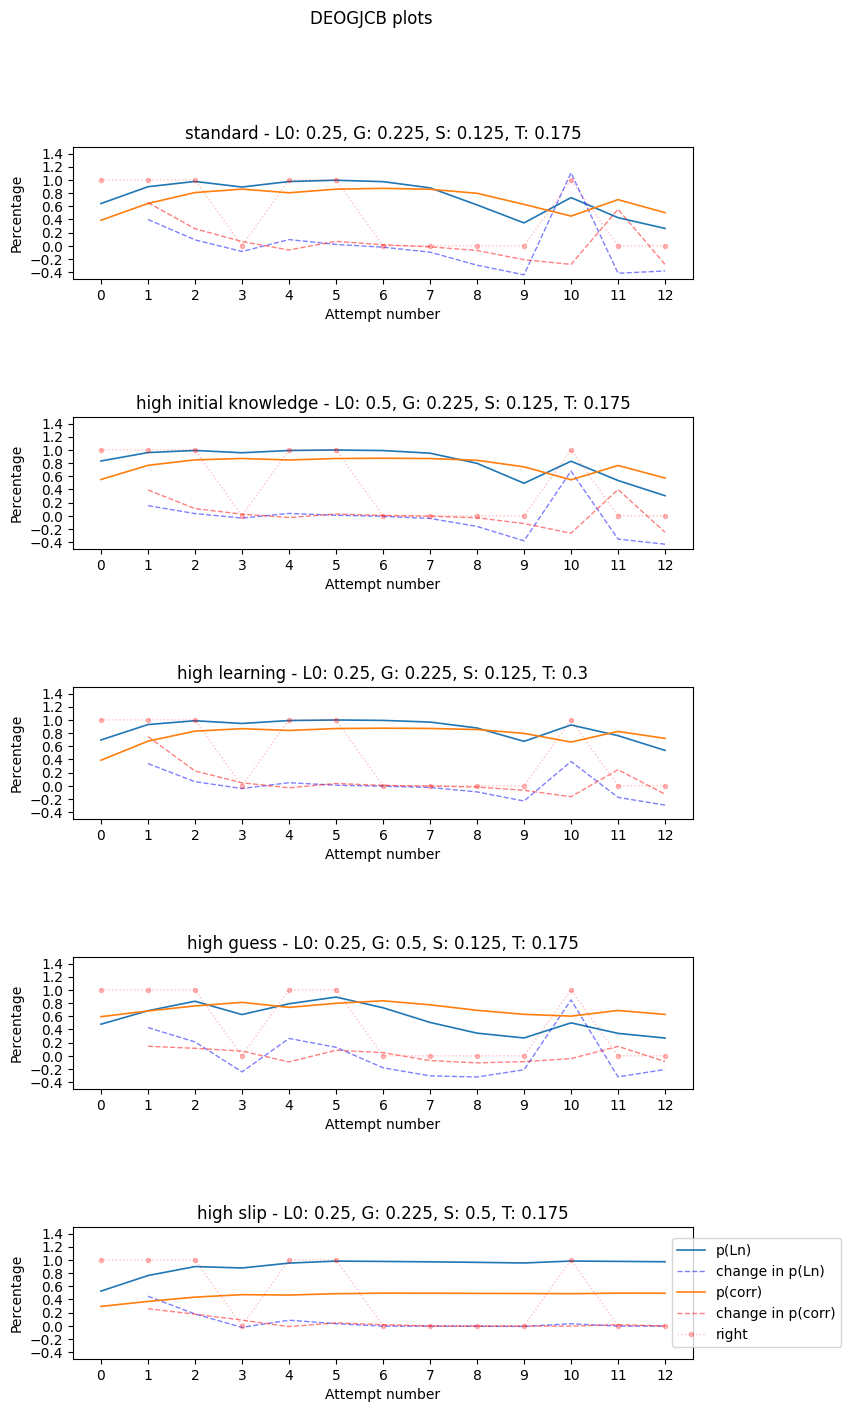

Here is what a student with perfect scores look like:

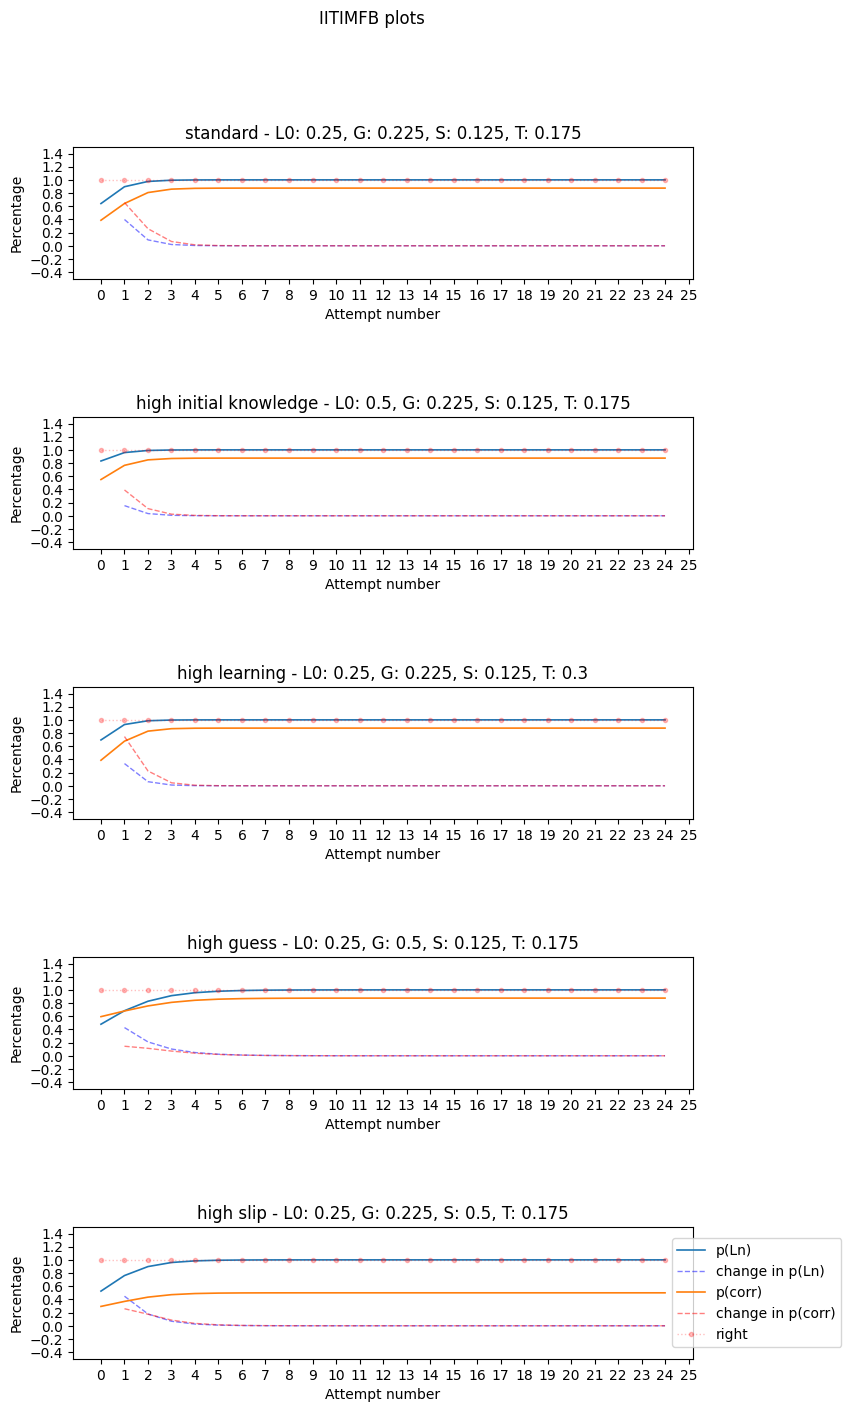

In [9]:
q2 = {
  'standard': bkt_data,
  'high initial knowledge': pd.read_excel('./data/BKT-data-high-initial-knowledge.xlsx'),
  'high learning': pd.read_excel('./data/BKT-data-high-learning.xlsx'),
  'high guess': pd.read_excel('./data/BKT-data-high-guess.xlsx'),
  'high slip': pd.read_excel('./data/BKT-data-high-slip.xlsx')
}

Function to plot a student.

Usage:

```py
plot_student(q2, student)
```

Where `student` stands for a string from the feature `'Student'`.

In [26]:
def get_plot_name(data: pd.DataFrame):
  return ', '.join([f'{n}: {data.iloc[0][n]}' for n in ['L0', 'G', 'S', 'T']])

def plot_student(data: dict[str, pd.DataFrame], student: str):
  print(f'Plotting {student}')
  fig, axes = plt.subplots(len(data), dpi=100)
  fig.suptitle(f'{student} plots')
  fig.tight_layout()
  fig.set_figheight(15)
  fig.set_figwidth(7)
  plt.setp(axes, yticks=np.arange(-2,2,.2), xticks=np.arange(0, data['high slip'].reset_index().index.max(), 1))
  i = 0
  linewidth = 1
  for origin_name, df in data.items():
    df = df[df['Student'] == student].reset_index()
    axes[i].set_title(f'{origin_name} - {get_plot_name(df)}')
    axes[i].set_xlabel('Attempt number')
    axes[i].set_ylabel('Percentage')
    
    axes[i].plot(df.index, df['p(Ln)'], label='p(Ln)', linewidth=linewidth+.2)
    axes[i].plot(df.index, df['p(Ln)'].pct_change(periods=1), alpha=.5, label='change in p(Ln)', linewidth=linewidth, c='b', linestyle='dashed')
    
    axes[i].plot(df.index, df['p(corr)'], label='p(corr)', linewidth=linewidth+.2)
    axes[i].plot(df.index, df['p(corr)'].pct_change(periods=1), alpha=.5, label='change in p(corr)', linewidth=linewidth, c='r', linestyle='dashed')
    
    axes[i].plot(df.index, df['right'], label='right', linewidth=linewidth, marker='.', linestyle='dotted', c='r', alpha=.25)
    
    axes[i].set_ylim([-.5,1.5])

    i+=1

  plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

Plotting a random student:

Plotting BKIDBCC


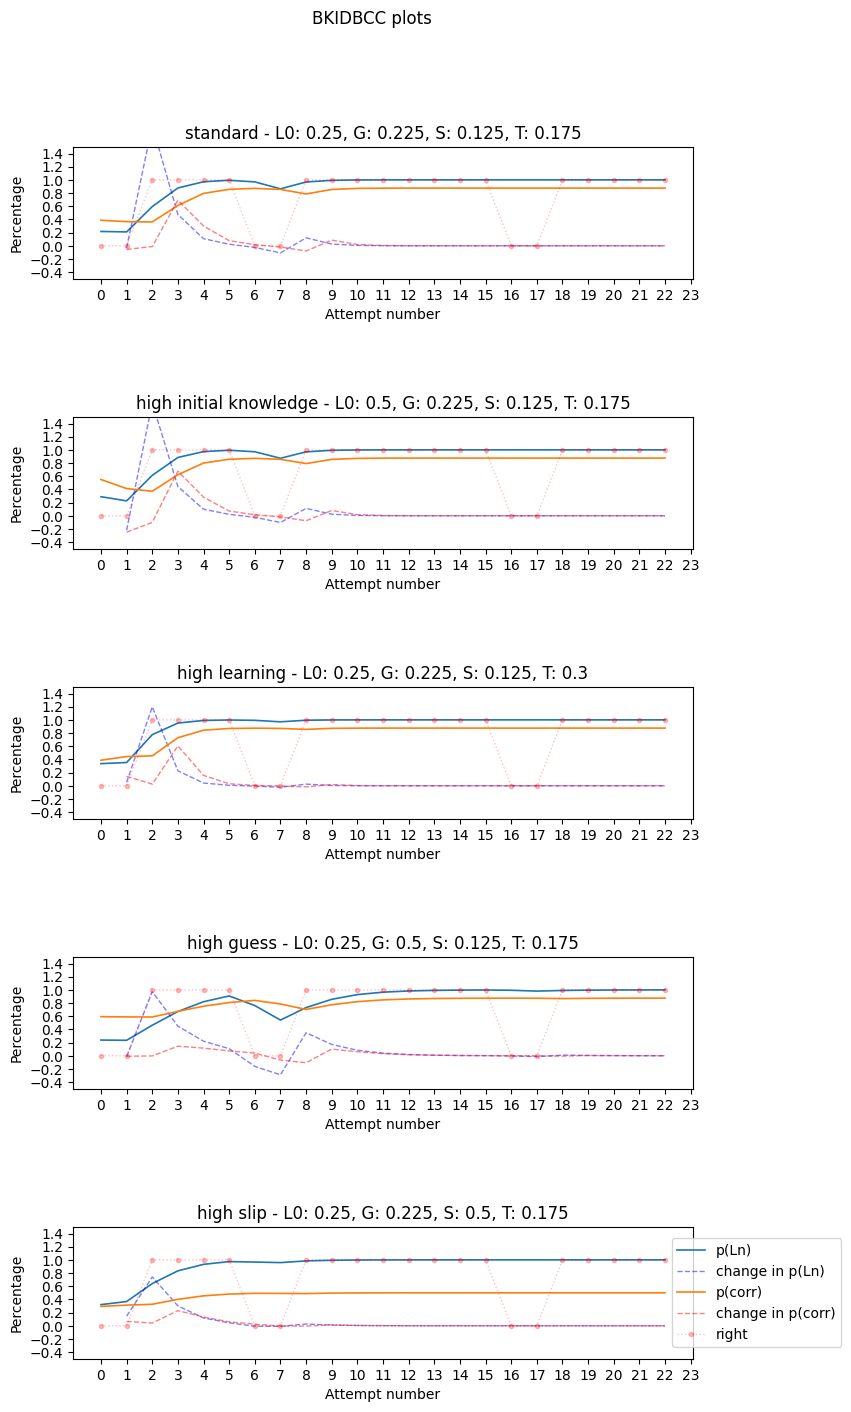

In [34]:
student_name = q2['high slip'].sample()['Student'].iloc[0]
plot_student(q2, student=student_name)